In [52]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from sklearn.preprocessing import OneHotEncoder
import re

In [4]:
!ls /Users/acyang@us.ibm.com/Desktop/7nmFEVs

7HPP_HLSN1_Anneal.csv      7HPP_HLSN1_Mx_vx.csv
7HPP_HLSN1_CM.csv          7HPP_HLSN1_PCCD.csv
7HPP_HLSN1_CT.csv          7HPP_HLSN1_PDA.csv
7HPP_HLSN1_Chamfer.csv     7HPP_HLSN1_RG.csv
7HPP_HLSN1_Dipoleannea.csv 7HPP_HLSN1_RPGDryetch.csv
7HPP_HLSN1_FBEOL.csv       7HPP_HLSN1_TJ.csv
7HPP_HLSN1_FinCD.csv       7HPP_HLSN1_TK.csv
7HPP_HLSN1_GQ.csv          7HPP_HLSN1_WETETCHENHA.csv
7HPP_HLSN1_Gaterecess.csv  7HPP_HLSN1_WellAnneal.csv
7HPP_HLSN1_Hch.csv         7HPP_HLSN1_gateheight.csv
7HPP_HLSN1_MDB.csv         7HPP_HLSN1_mWFBoolean.csv
7HPP_HLSN1_MOL.csv         7HPP_HLSN1_pMetalremov.csv


In [128]:
#df = pd.read_csv("~/Desktop/7nmFEVs/7HPP_HLSN1_Anneal.csv")
df = pd.read_csv("~/Desktop/7nmFEVs/7HPP_HLSN1_CM.csv")

In [129]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(np.array(df.CELLNO).reshape(len(df.CELLNO), 1))
columns = [df[df.CELLNO == 0].SHORTDESC.iloc[0],df[df.CELLNO == 1].SHORTDESC.iloc[0],df[df.CELLNO == 2].SHORTDESC.iloc[0]]
for i in range(len(columns)):
    columns[i] = re.sub(r'[.+]','',columns[i])

Fdf = pd.DataFrame(onehot_encoded,index=df.WAFERID,columns=columns)

In [130]:
Fdf.head()

,New,old,uncertain
WAFERID,,,
AZ2K4-01,0.0,1.0,0.0
AZ2K4-02,0.0,1.0,0.0
AZ2K4-04,0.0,1.0,0.0
AZ2K4-05,0.0,1.0,0.0
AZ2K4-06,0.0,1.0,0.0


In [131]:
Labels = pd.read_csv('/Users/acyang@us.ibm.com/Downloads/Fail_Signatures.csv')

In [132]:
data = Labels[['WaferId','Rad_pred','Smile_pred','SmallC_pred','BigC_pred']].set_index('WaferId').join(Fdf).reset_index().dropna()

In [150]:
def olsSummary(signature):
    fcn = signature+'~'

    for i in columns:
        if (data[i] == 1).any():
            fcn += i +'+'
    fcn = fcn[:-1]
    lm = sm.ols(fcn,data=data).fit(cov_type="cluster", cov_kwds={'groups':data["WaferId"]})
    print(lm.summary())

In [151]:
olsSummary('Rad_pred')

                            OLS Regression Results                            
Dep. Variable:               Rad_pred   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     72.47
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.59e-23
Time:                        14:51:11   Log-Likelihood:                -90.412
No. Observations:                 162   AIC:                             184.8
Df Residuals:                     160   BIC:                             191.0
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3623      0.031     11.825      0.0

In [152]:
olsSummary('Smile_pred')

                            OLS Regression Results                            
Dep. Variable:             Smile_pred   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.86
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           0.000445
Time:                        14:51:23   Log-Likelihood:                -11.951
No. Observations:                 162   AIC:                             27.90
Df Residuals:                     160   BIC:                             34.08
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0280      0.008      3.586      0.0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


In [154]:
olsSummary('SmallC_pred')

                            OLS Regression Results                            
Dep. Variable:            SmallC_pred   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                     4.130
Date:                Wed, 23 Oct 2019   Prob (F-statistic):             0.0178
Time:                        14:51:50   Log-Likelihood:                 17.897
No. Observations:                 162   AIC:                            -31.79
Df Residuals:                     160   BIC:                            -25.62
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0339      0.018      1.853      0.0

In [155]:
olsSummary('BigC_pred')

                            OLS Regression Results                            
Dep. Variable:              BigC_pred   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     7.536
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           0.000744
Time:                        14:52:03   Log-Likelihood:                -24.060
No. Observations:                 162   AIC:                             52.12
Df Residuals:                     160   BIC:                             58.29
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0478      0.019      2.513      0.0

In [160]:
data[data.Rad_pred==1]

,WaferId,Rad_pred,Smile_pred,SmallC_pred,BigC_pred,New,old,uncertain
2,AZ2RG-06,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AZ2RG-17,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,AZ2RU-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,AZ2RU-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,AZ2RU-03,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,AZ2RU-04,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,AZ2RU-05,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,AZ2RU-08,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11,AZ2RU-11,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12,AZ2RU-12,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [55]:
# model values
model_fitted_y = lm.fittedvalues
# model residuals
model_residuals = lm.resid
# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

In [37]:
df.columns[-1]

'LotIdBase'

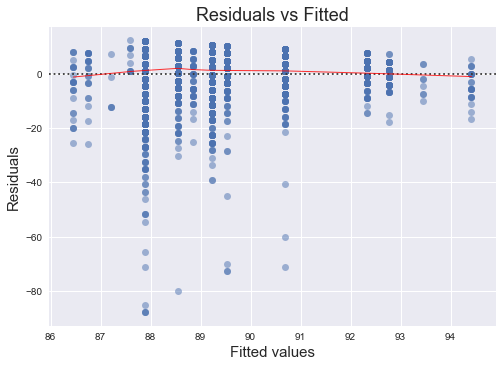

In [45]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(lm.fittedvalues, lm.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

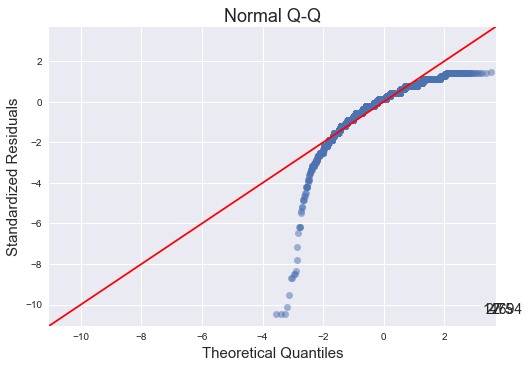

In [51]:
QQ = ProbPlot(lm.get_influence().resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(lm.get_influence().resid_studentized_internal)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   lm.get_influence().resid_studentized_internal[i]));


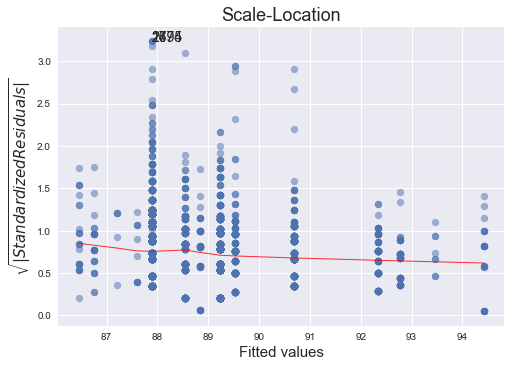

In [56]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_norm_residuals_abs_sqrt[i]));

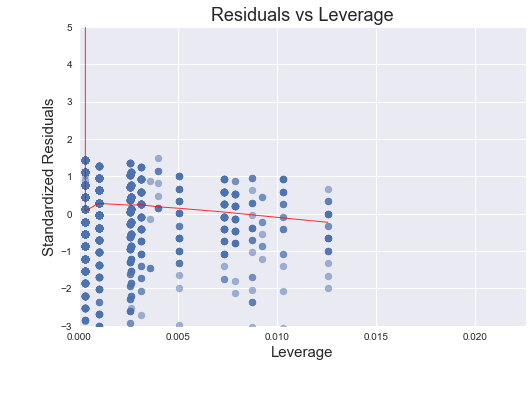

In [57]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                    model_norm_residuals[i]));